In [1]:
!pip install graphviz

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier

In [3]:
df= pd.read_csv("bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df =pd.get_dummies(df, columns=["job","marital","education","default","housing","loan","contact","month","poutcome","deposit"],drop_first=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   duration             11162 non-null  int64
 4   campaign             11162 non-null  int64
 5   pdays                11162 non-null  int64
 6   previous             11162 non-null  int64
 7   job_blue-collar      11162 non-null  bool 
 8   job_entrepreneur     11162 non-null  bool 
 9   job_housemaid        11162 non-null  bool 
 10  job_management       11162 non-null  bool 
 11  job_retired          11162 non-null  bool 
 12  job_self-employed    11162 non-null  bool 
 13  job_services         11162 non-null  bool 
 14  job_student          11162 non-null  bool 
 15  job_technician       11162 non-null  bool 
 16  job_unemployed       1

In [8]:
y = df["deposit_yes"]
x=df.drop(["deposit_yes"],axis=1)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.77,random_state=42)

In [10]:
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
model.score(x_test,y_test)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7912772585669782

In [11]:
y.iloc[80]

True

In [12]:
predictx=np.array(x.iloc[80])

In [13]:
model.predict([predictx])

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [14]:
model1=DecisionTreeClassifier(max_depth=4,min_samples_split=10,random_state=42)
model1.fit(x_train,y_train)
model1.score(x_train,y_train)

0.7858971375378171

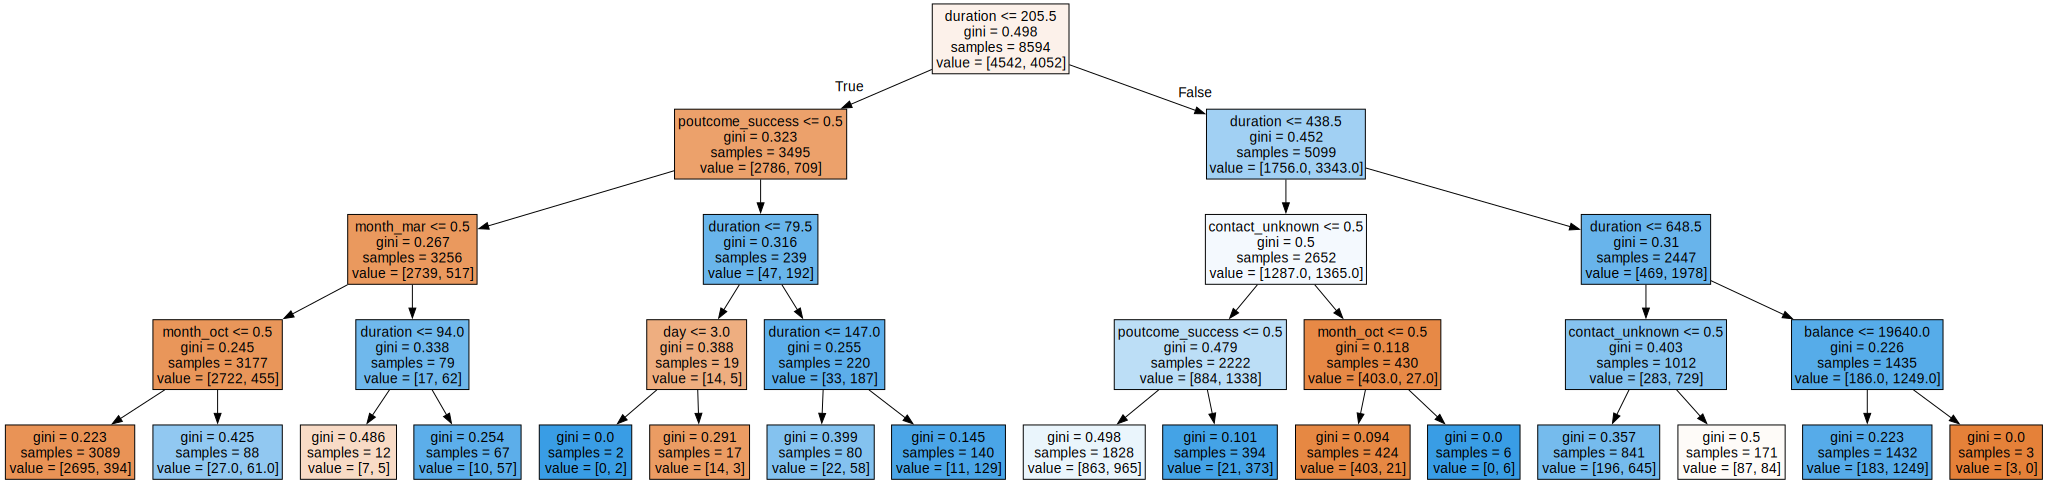

In [15]:
dot=export_graphviz(model1,feature_names=x.columns,filled=True)
visual=graphviz.Source(dot)
visual

In [18]:
forest=RandomForestClassifier(n_estimators=400,max_depth=5)
model=forest.fit(x_train,y_train)
model.score(x_test,y_test)

0.8084112149532711